In [1]:
from feature_process import *
from data_process import *
from pose_cluster import *

In [2]:
feat_type = 'bsF'
model_type = 'svm'
add_cluster = 'Y'
classes = 3

basal: 65  ,pain: 15  sng: 25  pH7.4: 15  sngKO: 6  CapKO: 4
pose clustering...
motions num:  50
bad motions: 14


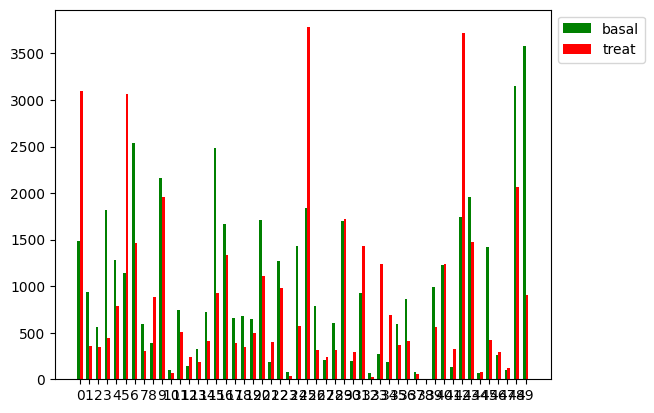

In [3]:
if feat_type == 'frame':
    dlc_root = r'..\final_data\landmark5'
    dlc = DataSet(dlc_root)
else:
    dlc_root = r'..\final_data\landmark7'
    if feat_type[-1]=='H':
        bs_root = r'..\final_data\bsoidfeat'
    else:
        bs_root = r'..\final_data\bsoidfeat2'
    dlc = DataSet(dlc_root, bsoid=bs_root)
dlc.generate_feature(feat_type=feat_type)

if add_cluster == 'Y':
    print('pose clustering...')
    dlc.pose_cls(sel=['Cap','Capbasal'], sel_num=20, embed=False, k=50, cls_type='km', clf_type='svm')

In [4]:
res_te = []
res_tt = []
res_te0 = []
res_tt0 = []

i=10
# for i in range(10):
dlc.generate_train_test(split=0.5, motion_del=False, k=i+1)

# model
x_train = np.concatenate(dlc.data['x_train'])
y_train = np.concatenate(dlc.data['y_train'])
model = Analysis(model_type=model_type, classes=classes)
model.train(x_train,y_train)
# x_test = np.concatenate(dlc.data['x_test'])
# y_test = np.concatenate(dlc.data['y_test'])
# res_te.append(model.analysis2(x_test, y_test))
# # res_te0.append(model.analysis(x_test, y_test))
# x_val = np.concatenate(dlc.data['x_val'])
# y_val = np.concatenate(dlc.data['y_val'])
# res_tt.append(model.analysis2(x_val, y_val))
    # res_tt0.append(model.analysis(x_val, y_val))

In [6]:
np.savetxt(r'C:\Users\x\Desktop\final_data/analysis_SPDR/(YSNN_SVM)res_te.csv', np.array(res_te), delimiter=',', fmt='%.2f')
np.savetxt(r'C:\Users\x\Desktop\final_data/analysis_SPDR/(YSNN_SVM)res_tt.csv', np.array(res_tt), delimiter=',', fmt='%.2f')

In [7]:
# joblib.dump(model.model, r'C:\Users\x\Desktop\final_data/analysis_SPDR/(YSNN_SVM)model.sav')

['C:\\Users\\x\\Desktop\\final_data/analysis_SPDR/(YSNN_SVM)model.sav']

In [6]:
dlc.generate_train_test(split=0.1, motion_del=False, k=10)
model = Analysis(model_type=model_type, classes=classes)
x_train = np.concatenate(dlc.data['x_train'])
y_train = np.concatenate(dlc.data['y_train'])
model.model = joblib.load(r'C:\Users\x\Desktop\final_data/analysis_SPDR/(YSNN_SVM)model.sav')

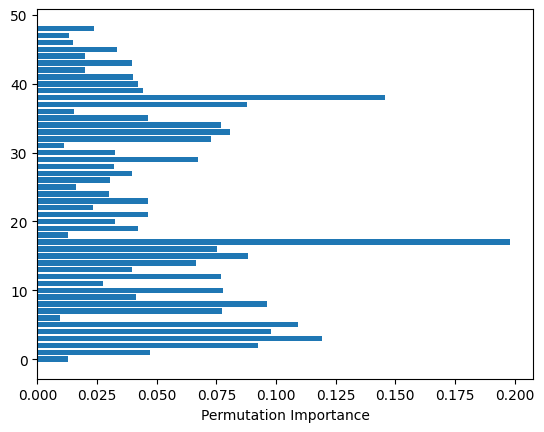

In [7]:
imp = model.feat_importance(x_train,y_train, r'C:\Users\x\Desktop\final_data/analysis_imp/(YSNN_SVM)FI.jpg')

In [2]:
#joblib.dump(imp, r'C:\Users\x\Desktop\final_data/analysis_imp/(YSNN_SVM)imp.sav')
imp = joblib.load(r'C:\Users\x\Desktop\final_data/analysis_imp/(YSNN_SVM)imp.sav')

In [27]:
import matplotlib as mpl
import itertools
def mergecells(table, cells, showid):
    '''
    Merge N matplotlib.Table cells

    Parameters
    -----------
    table: matplotlib.Table
        the table
    cells: list[set]
        list of sets od the table coordinates
        - example: [(0,1), (0,0), (0,2)]

    Notes
    ------
    https://stackoverflow.com/a/53819765/12684122
    '''
    cells_array = [np.asarray(c) for c in cells]
    h = np.array([cells_array[i+1][0] - cells_array[i][0] for i in range(len(cells_array) - 1)])
    v = np.array([cells_array[i+1][1] - cells_array[i][1] for i in range(len(cells_array) - 1)])

    # if it's a horizontal merge, all values for `h` are 0
    if not np.any(h):
        # sort by horizontal coord
        cells = np.array(sorted(list(cells), key=lambda v: v[1]))
        edges = ['BTL'] + ['BT' for i in range(len(cells) - 2)] + ['BTR']
    elif not np.any(v):
        cells = np.array(sorted(list(cells), key=lambda h: h[0]))
        edges = ['TRL'] + ['RL' for i in range(len(cells) - 2)] + ['BRL']
    else:
        raise ValueError("Only horizontal and vertical merges allowed")

    for cell, e in zip(cells, edges):
        table[cell[0], cell[1]].visible_edges = e
        
    txts = [table[cell[0], cell[1]].get_text() for cell in cells]
    tpos = [np.array(t.get_position()) for t in txts]

    # transpose the text of the left cell
    trans = (tpos[-1] - tpos[0])/2
    # didn't had to check for ha because I only want ha='center'
    txts[0].set_transform(mpl.transforms.Affine2D().translate(*trans))
    for txt in txts:
        txt.set_visible(False)
    txts[showid].set_visible(True)

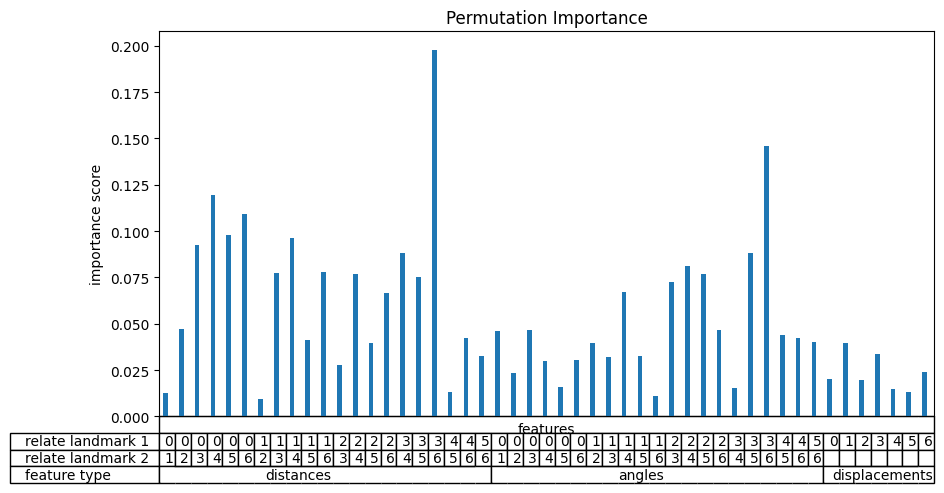

In [48]:
## plot method tmp
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(49)
y = imp
x2 = np.array(['']*10+['distances']+['']*10+['']*10+['angles']+['']*10+['']*6+['displacements'])
x0 = []
x1 = []
for i, j in itertools.combinations(range(7), 2):
    x0.append(str(i))
    x1.append(str(j))
for i, j in itertools.combinations(range(7), 2):
    x0.append(str(i))
    x1.append(str(j))
for i in range(7):
    x0.append(str(i))
    x1.append('')
cell = [x0,x1,x2.astype('object')]

fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_subplot(111)


y = np.array(y)
cell = np.array(cell)

ax.title.set_text('Permutation Importance')
width = 0.3
x = np.arange(len(y))
spare_width = (1 - width)


ax.bar(x-width, y, width)#, label=legends[compare][r])
ax.set_xlim(-spare_width,len(x)-spare_width)
plt.xticks([])
plt.ylabel('importance score')
plt.xlabel('features')
# plt.legend(loc='center right', bbox_to_anchor=(1.28, 0.5))

# plot table
table = plt.table(cellText=cell,
        rowLabels=['relate landmark 1','relate landmark 2','feature type'],
        colLabels=['']*len(y),
        loc='bottom')

table.auto_set_font_size(False)
table.set_fontsize(10)

#merge cells
mergecells(table, [(0,i) for i in range(49)], 0)
mergecells(table, [(3,i) for i in range(21)], 10)
mergecells(table, [(3,i) for i in range(21,42)], 10)
mergecells(table, [(3,i) for i in range(42,49)], 6)

# if save_root:
#     plt.savefig(save_root+cmp_titles[compare]+'_'+axess[s]+'_'+str(i+1)+'.png', bbox_inches="tight")

### MISC

<BarContainer object of 258 artists>

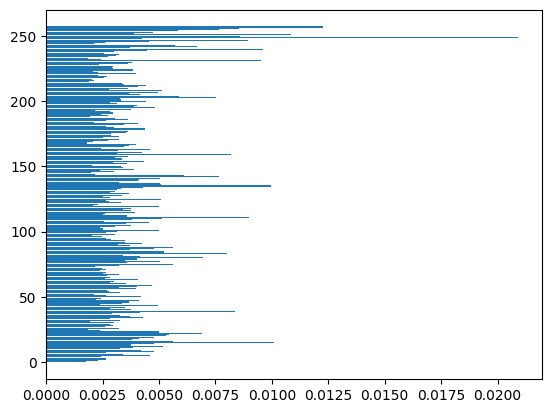

In [12]:
imp = model.model.feature_importances_
plt.barh(np.arange(len(imp)),imp)

In [8]:
joblib.dump(imp, r'C:\Users\x\Desktop\final_data/analysis_imp/(YSNN_SVM)imp.sav')

['C:\\Users\\x\\Desktop\\final_data/analysis_imp/(YSNN_SVM)imp.sav']

Text(0.5, 0, 'Importance Sum')

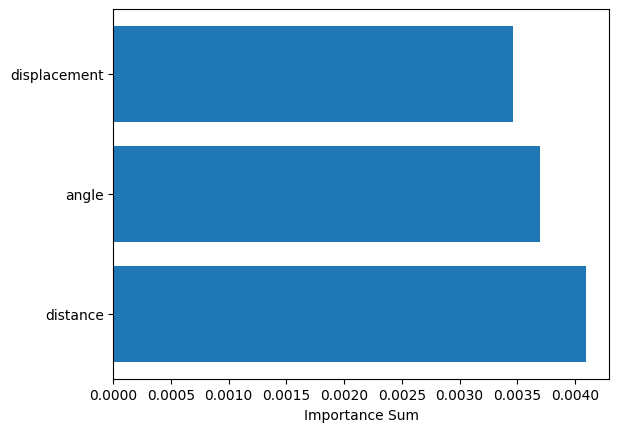

In [13]:
feature_names = ['distance','angle','displacement']
features = np.array(feature_names)
x = [0,0,0]
for i in range(21):
    x[0]+=imp[i]/21
    x[1]+=imp[21+i]/21
for i in range(7):
    x[2]+=imp[42+i]/7
plt.barh(features, x)
plt.xlabel("Importance Sum")

Text(0.5, 0, 'Importance sum')

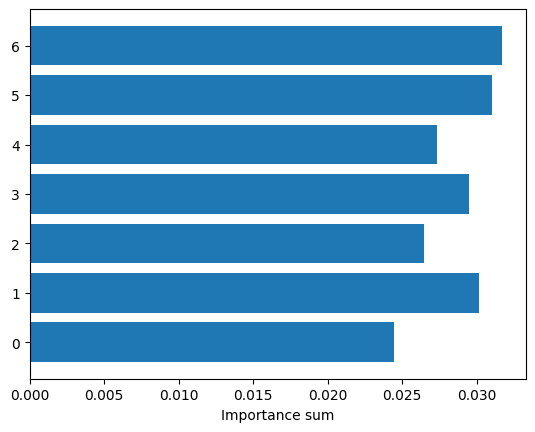

In [14]:
x = [0,0,0,0,0,0,0]

i=0
for d in range(7,-1,-1):
    for j in range(1,d):
        x[7-d]+=imp[i+j]/2
        x[7-d+j]+=imp[i+j]/2
        i+=1

i=21
for d in range(7,-1,-1):
    for j in range(1,d):
        x[7-d]+=imp[i+j]/2
        x[7-d+j]+=imp[i+j]/2
        i+=1

for j in range(7):
    x[j]+=imp[42+j]

features = np.arange(7)
plt.barh(features, x)
plt.xlabel("Importance sum")

In [16]:
np.argmax(imp)

249

In [18]:
len(imp)

258

Text(0.5, 0, 'Importance Sum')

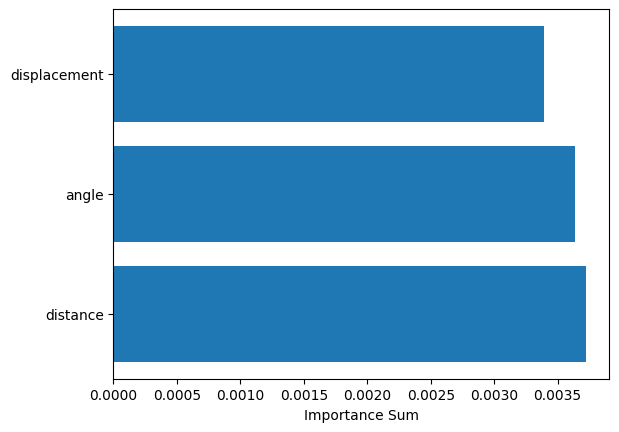

In [20]:
x = [np.mean(imp[0:120]),np.mean(imp[120:180]),np.mean(imp[180:240])]
features = ['distance','angle','displacement']
plt.barh(features, x)
plt.xlabel("Importance Sum")

### Distribution

In [1]:
import seaborn as sns
import pandas as pd
from feature_process import *
from data_process import *
from pose_cluster import *

In [2]:
feat_type = 'bsF'
model_type = 'svm'
add_cluster = 'Y'
classes = 3

In [3]:
if feat_type == 'frame':
    dlc_root = r'..\final_data\landmark5'
    dlc = DataSet(dlc_root)
else:
    dlc_root = r'..\final_data\landmark7'
    if feat_type[-1]=='H':
        bs_root = r'..\final_data\bsoidfeat'
    else:
        bs_root = r'..\final_data\bsoidfeat2'
    dlc = DataSet(dlc_root, bsoid=bs_root)
dlc.generate_feature(feat_type=feat_type)

# if add_cluster == 'Y':
#     print('pose clustering...')
#     dlc.pose_cls(sel=['Cap','Capbasal'], sel_num=20, embed=False, k=50, cls_type='km', clf_type='svm')

basal: 65  ,pain: 15  sng: 25  pH7.4: 15  sngKO: 6  CapKO: 4


In [24]:
feats = dlc.sel_feat(treatment='basal')
basalfeat = []
sel = 21+17
bias = 0
for feat in feats:
    basalfeat.append(feat.feature[:,sel]+bias)
basalfeat = np.concatenate(basalfeat)

feats = dlc.sel_feat(treatment='Cap')
capfeat = []
for feat in feats:
    capfeat.append(feat.feature[:,sel]+bias)
capfeat = np.concatenate(capfeat)

feats = dlc.sel_feat(treatment='pH5.2')
sngfeat = []
for feat in feats:
    sngfeat.append(feat.feature[:,sel]+bias)
sngfeat = np.concatenate(sngfeat)


dic = {}
dic['Health'] = basalfeat
dic['Pain'] = capfeat
dic['Sng'] = sngfeat

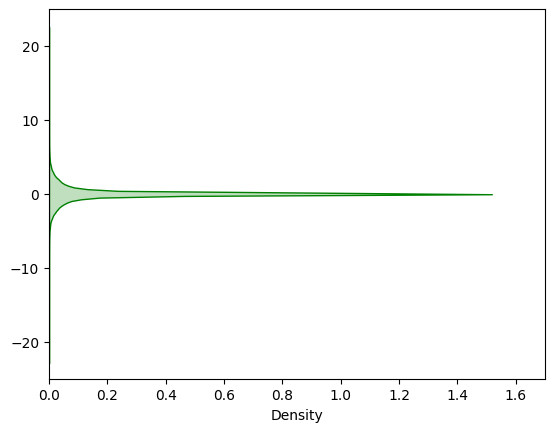

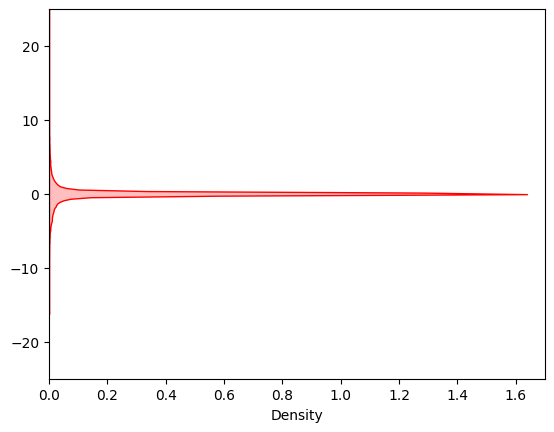

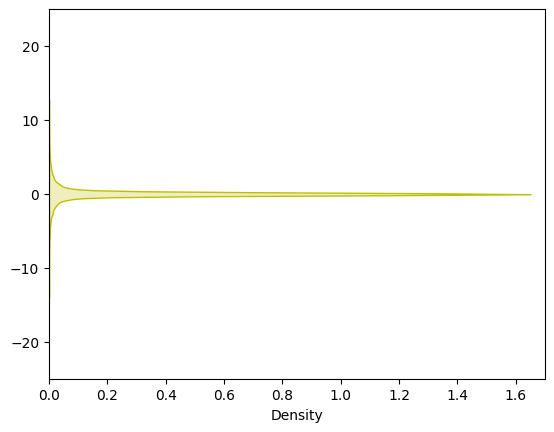

In [26]:
xlim1,xlim2 = 0,1.7
ylim1,ylim2 = -25,25
plt.figure()
sns.kdeplot(y=basalfeat,fill=True,legend=False, color="g")
plt.xlim(xlim1,xlim2)
plt.ylim(ylim1,ylim2)
plt.savefig('../1.png')
plt.figure()
sns.kdeplot(y=capfeat,fill=True,legend=False, color="r")
plt.xlim(xlim1,xlim2)
plt.ylim(ylim1,ylim2)
plt.savefig('../2.png')
plt.figure()
sns.kdeplot(y=sngfeat,fill=True,legend=False, color="y")
plt.xlim(xlim1,xlim2)
plt.ylim(ylim1,ylim2)
plt.savefig('../3.png')

c:\Users\x\miniconda3\envs\micelab\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\x\miniconda3\envs\micelab\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\x\miniconda3\envs\micelab\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

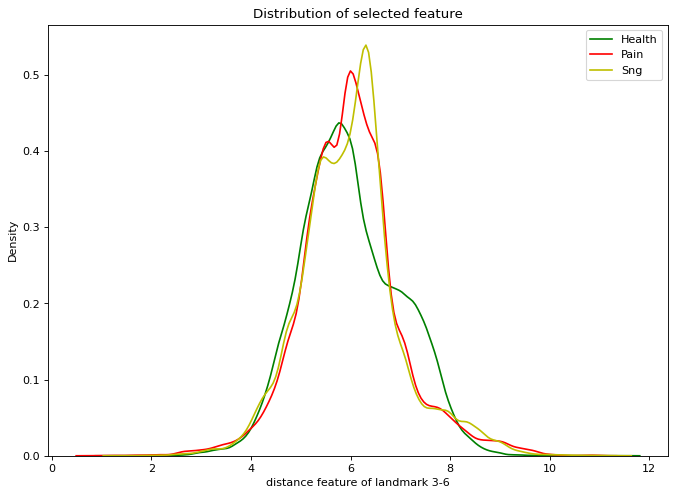

In [94]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(basalfeat, color="g", label="Health", kde=True, hist=False)
sns.distplot(capfeat, color="r", label="Pain", kde=True, hist=False)
sns.distplot(sngfeat, color="y", label="Sng", kde=True, hist=False)
plt.xlabel("distance feature of landmark 3-6")
plt.title("Distribution of selected feature")
plt.legend()

c:\Users\x\miniconda3\envs\micelab\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\x\miniconda3\envs\micelab\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\x\miniconda3\envs\micelab\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

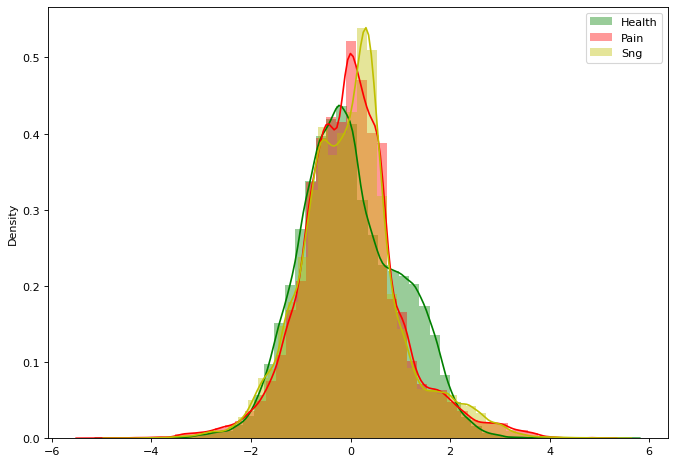

In [76]:
# Plot
kwargs = dict(hist_kws={'alpha':.4})#, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(basalfeat, color="g", label="Health", **kwargs)
sns.distplot(capfeat, color="r", label="Pain", **kwargs)
sns.distplot(sngfeat, color="y", label="Sng", **kwargs)
plt.legend()